# **DiaDetect: Prediksi Risiko Diabetes (Klasifikasi Multi-Kelas)**
Pada notebook ini, kita akan mengembangkan model machine learning untuk prediksi risiko diabetes menggunakan data dari **diabetes_012_health_indicators_BRFSS2015.csv**. Model ini akan mengklasifikasikan risiko diabetes menjadi tiga kategori:  
- **0** untuk tidak diabetes   
- **1** untuk prediabetes  
- **2** untuk diabetes  

---



## Mengimpor Semua Library yang Dibutuhkan


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import files

## Mengunggah dan Menampilkan 5 baris pertama dataset untuk eksplorasi awal


In [ ]:
# Mengunggah file dataset langsung (CSV)
uploaded = files.upload()

# Menyimpan file dataset
file_name = list(uploaded.keys())[0]

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv


In [ ]:
# Membaca dataset
data = pd.read_csv(file_name)

# Menampilkan 5 baris pertama dari dataset untuk memeriksa
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Eksplorasi Data Lanjutan


In [ ]:
# Statistik deskriptif dataset
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Cek informasi tipe data dan nilai yang hilang
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
import pandas as pd

# Dataframe Anda (data_cleaned_no_duplicates misalnya)
# Pastikan data Anda sudah dimuat sebelumnya, seperti:
# data_cleaned_no_duplicates = pd.read_csv("your_data.csv")

# Menyimpan data asli ke DataFrame terpisah
original_data = data.copy()

# Mengubah 'Diabetes_012' menjadi kategori dengan nama yang lebih deskriptif
data['Diabetes_012'] = data['Diabetes_012'].map({0: 'no diabetes', 1: 'prediabetes', 2: 'diabetes'}).astype('category')

# Mengubah kolom lain menjadi kategori dengan nama deskriptif
data['HighBP'] = data['HighBP'].map({0: 'no high BP', 1: 'high BP'}).astype('category')
data['HighChol'] = data['HighChol'].map({0: 'no high cholesterol', 1: 'high cholesterol'}).astype('category')
data['CholCheck'] = data['CholCheck'].map({0: 'no cholesterol check in 5 years', 1: 'cholesterol check in 5 years'}).astype('category')
data['Smoker'] = data['Smoker'].map({0: 'no', 1: 'yes'}).astype('category')
data['Stroke'] = data['Stroke'].map({0: 'no', 1: 'yes'}).astype('category')
data['HeartDiseaseorAttack'] = data['HeartDiseaseorAttack'].map({0: 'no', 1: 'yes'}).astype('category')
data['PhysActivity'] = data['PhysActivity'].map({0: 'no', 1: 'yes'}).astype('category')
data['Fruits'] = data['Fruits'].map({0: 'no', 1: 'yes'}).astype('category')
data['Veggies'] = data['Veggies'].map({0: 'no', 1: 'yes'}).astype('category')
data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].map({0: 'no', 1: 'yes'}).astype('category')
data['AnyHealthcare'] = data['AnyHealthcare'].map({0: 'no', 1: 'yes'}).astype('category')
data['NoDocbcCost'] = data['NoDocbcCost'].map({0: 'no', 1: 'yes'}).astype('category')
data['DiffWalk'] = data['DiffWalk'].map({0: 'no', 1: 'yes'}).astype('category')
data['Sex'] = data['Sex'].map({0: 'female', 1: 'male'}).astype('category')

# Cek hasil perubahan tipe data
print("Tipe data setelah perubahan:")
print(data.dtypes)

# Cek data asli yang disalin ke DataFrame terpisah
print("\nTipe data pada DataFrame asli:")
print(original_data.dtypes)


Tipe data setelah perubahan:
Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                      float64
Education                float64
Income                   float64
dtype: object

Tipe data pada DataFrame asli:
Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke 

In [ ]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no diabetes,high BP,high cholesterol,cholesterol check in 5 years,40.0,yes,no,no,no,no,...,yes,no,5.0,18.0,15.0,yes,female,9.0,4.0,3.0
1,no diabetes,no high BP,no high cholesterol,no cholesterol check in 5 years,25.0,yes,no,no,yes,no,...,no,yes,3.0,0.0,0.0,no,female,7.0,6.0,1.0
2,no diabetes,high BP,high cholesterol,cholesterol check in 5 years,28.0,no,no,no,no,yes,...,yes,yes,5.0,30.0,30.0,yes,female,9.0,4.0,8.0
3,no diabetes,high BP,no high cholesterol,cholesterol check in 5 years,27.0,no,no,no,yes,yes,...,yes,no,2.0,0.0,0.0,no,female,11.0,3.0,6.0
4,no diabetes,high BP,high cholesterol,cholesterol check in 5 years,24.0,no,no,no,yes,yes,...,yes,no,2.0,3.0,0.0,no,female,11.0,5.0,4.0


In [ ]:
# Mengecek missing values
print(data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# Cek duplikat pada dataset
duplicate_rows = data[data.duplicated()]

# Menampilkan jumlah baris yang duplikat
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 23899


In [ ]:
# Menghapus duplikat jika ada
data.drop_duplicates(inplace=True)

In [ ]:
# Cek duplikat pada dataset
duplicate_rows = data[data.duplicated()]

# Menampilkan jumlah baris yang duplikat
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


<Figure size 1800x1400 with 0 Axes>

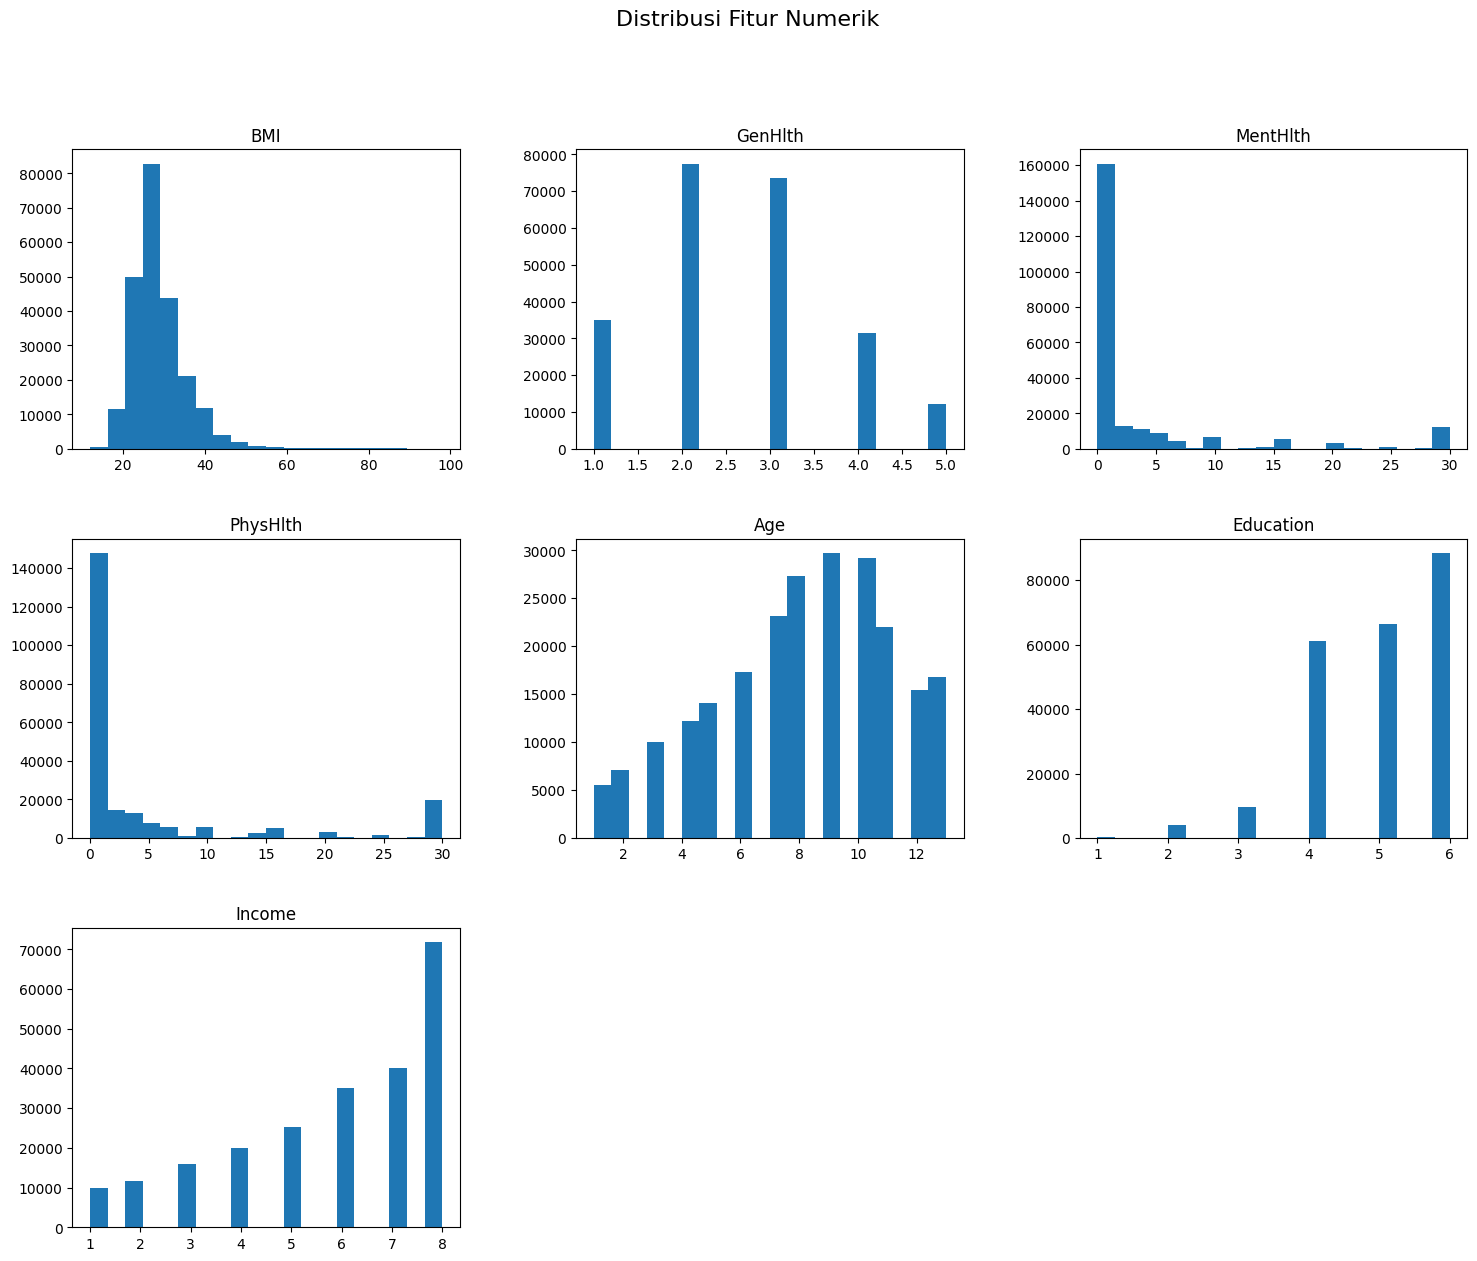

In [ ]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(18, 14))
data.hist(bins=20, figsize=(18, 14), grid=False)
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

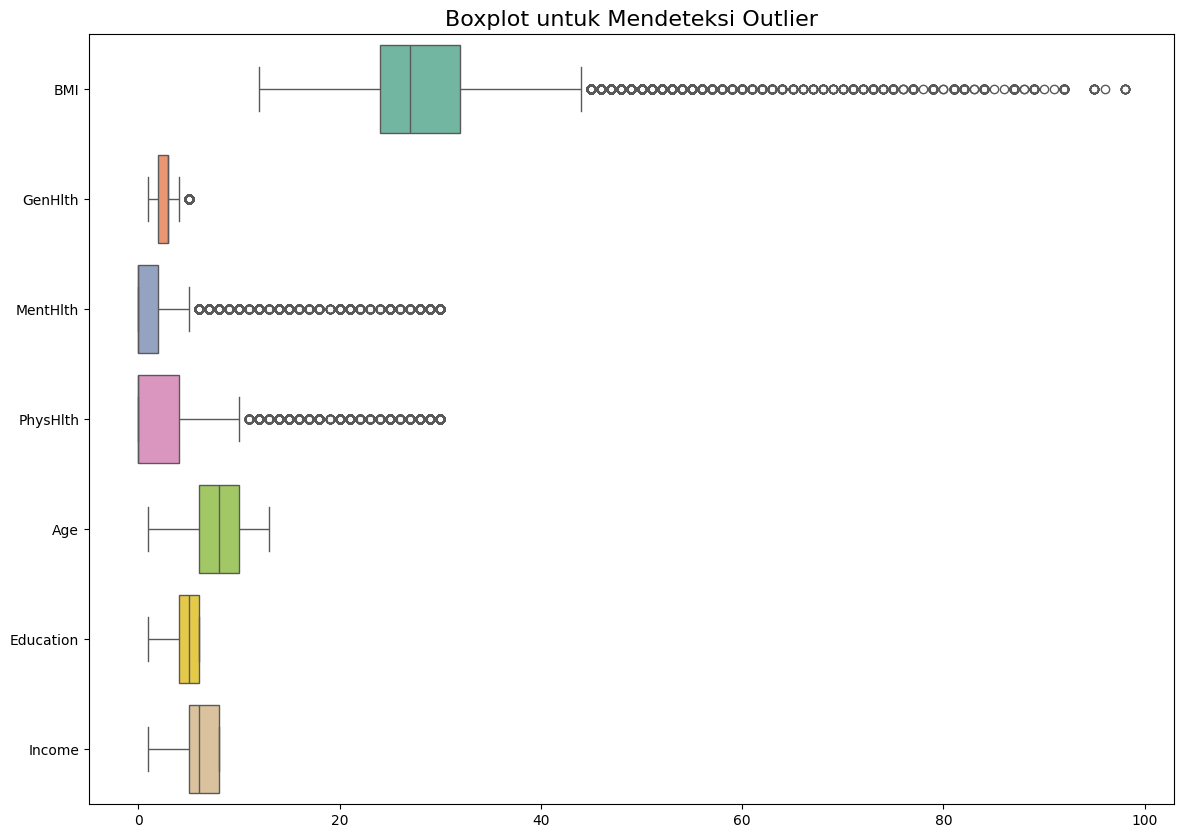

In [ ]:
# Mencari outlier menggunakan boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title('Boxplot untuk Mendeteksi Outlier', fontsize=16)
plt.show()

<ipython-input-15-8da6df89d03c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=data, palette='Set2')


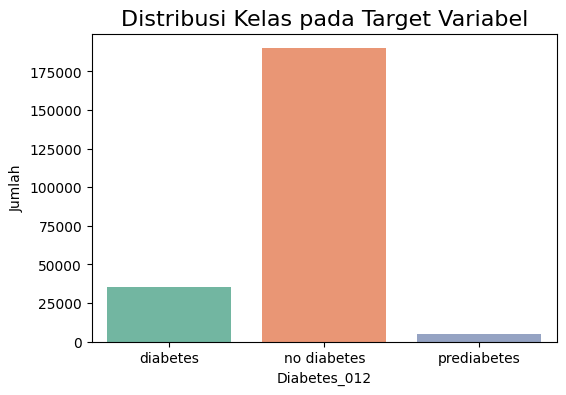

Distribusi Persentase Setiap Kelas:
 Diabetes_012
no diabetes    82.711364
diabetes       15.274109
prediabetes     2.014527
Name: proportion, dtype: float64


In [ ]:
# Pemeriksaan ketidakseimbangan kelas pada target variabel
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=data, palette='Set2')
plt.title('Distribusi Kelas pada Target Variabel', fontsize=16)
plt.ylabel('Jumlah')
plt.show()

# Menampilkan distribusi persentase setiap kelas
class_distribution = data['Diabetes_012'].value_counts(normalize=True) * 100
print("Distribusi Persentase Setiap Kelas:\n", class_distribution)

In [ ]:
# Menampilkan statistik deskriptif
print(data.describe())

                BMI        GenHlth       MentHlth       PhysHlth  \
count  229781.00000  229781.000000  229781.000000  229781.000000   
mean       28.68567       2.601151       3.505373       4.675178   
std         6.78636       1.064685       7.713725       9.046568   
min        12.00000       1.000000       0.000000       0.000000   
25%        24.00000       2.000000       0.000000       0.000000   
50%        27.00000       3.000000       0.000000       0.000000   
75%        32.00000       3.000000       2.000000       4.000000   
max        98.00000       5.000000      30.000000      30.000000   

                 Age      Education         Income  
count  229781.000000  229781.000000  229781.000000  
mean        8.086582       4.980568       5.890383  
std         3.093809       0.992895       2.092477  
min         1.000000       1.000000       1.000000  
25%         6.000000       4.000000       5.000000  
50%         8.000000       5.000000       6.000000  
75%        10.00

## Pra-Pemrosesan Data


In [ ]:
# Pilih fitur numerik untuk distandarisasi
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan StandardScaler pada fitur numerik
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Cek beberapa baris data setelah distandarisasi
data.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,no diabetes,high BP,high cholesterol,cholesterol check in 5 years,1.667220,yes,no,no,no,no,...,yes,no,2.253111,1.879074,1.141300,yes,female,0.295241,-0.987588,-1.381324
1,no diabetes,no high BP,no high cholesterol,no cholesterol check in 5 years,-0.543101,yes,no,no,yes,no,...,no,yes,0.374618,-0.454434,-0.516791,no,female,-0.351213,1.026729,-2.337131
2,no diabetes,high BP,high cholesterol,cholesterol check in 5 years,-0.101037,no,no,no,no,yes,...,yes,yes,2.253111,3.434746,2.799391,yes,female,0.295241,-0.987588,1.008193
3,no diabetes,high BP,no high cholesterol,cholesterol check in 5 years,-0.248391,no,no,no,yes,yes,...,yes,no,-0.564629,-0.454434,-0.516791,no,female,0.941695,-1.994746,0.052387
4,no diabetes,high BP,high cholesterol,cholesterol check in 5 years,-0.690456,no,no,no,yes,yes,...,yes,no,-0.564629,-0.065516,-0.516791,no,female,0.941695,0.019571,-0.903420


In [ ]:
from sklearn.preprocessing import StandardScaler

# Daftar kolom yang numerik dan harus distandarisasi di data_original
numerical_features_manual = [
    'BMI', 'GenHlth', 'PhysHlth', 'MentHlth', 'Age', 'Education', 'Income'  # Kolom numerik yang ingin distandarisasi
]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan StandardScaler pada fitur numerik yang dipilih secara manual di data_original
original_data[numerical_features_manual] = scaler.fit_transform(original_data[numerical_features_manual])

# Cek beberapa baris data setelah distandarisasi
original_data.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.329121,1.998592,1.233999,1.0,0.0,0.316900,-1.065595,-1.474487
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.457294,-0.429630,-0.486592,0.0,0.0,-0.337933,0.963272,-2.440138
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,2.329121,3.617407,2.954590,1.0,0.0,0.316900,-1.065595,0.939638
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-0.478619,-0.429630,-0.486592,0.0,0.0,0.971733,-2.080028,-0.026012
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-0.478619,-0.024926,-0.486592,0.0,0.0,0.971733,-0.051162,-0.991662


<ipython-input-19-89ea7518aef9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


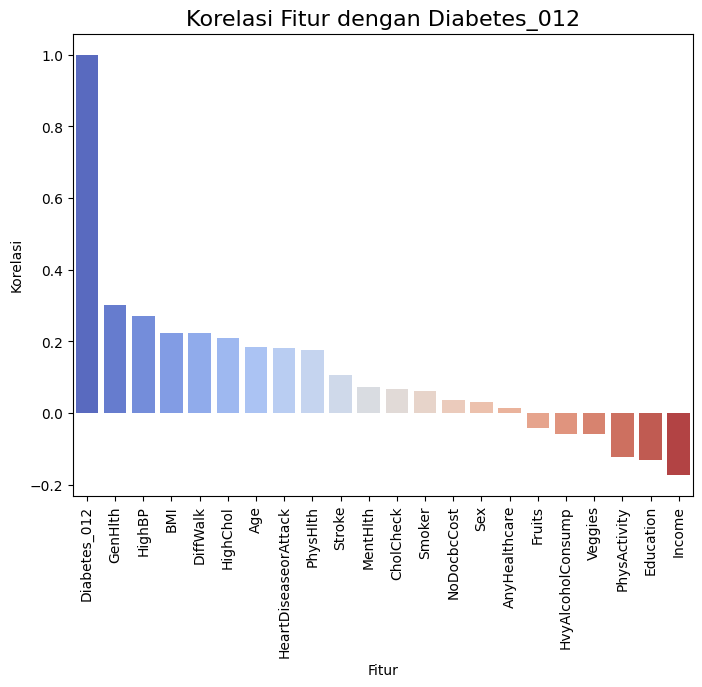

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


In [ ]:
# Menghitung korelasi antar fitur setelah standarisasi
correlation_matrix = original_data.corr()

# Memilih hanya korelasi dengan kolom target 'Diabetes_012'
correlation_with_target = correlation_matrix['Diabetes_012'].sort_values(ascending=False)

# Menampilkan korelasi dengan 'Diabetes_012' dalam bentuk heatmap atau bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Korelasi Fitur dengan Diabetes_012', fontsize=16)
plt.xlabel('Fitur')
plt.ylabel('Korelasi')
plt.xticks(rotation=90)  # Memutar label fitur agar lebih mudah dibaca
plt.show()

# Menampilkan nilai korelasi
print(correlation_with_target)

In [ ]:
# Menentukan kolom yang ingin didrop berdasarkan korelasi rendah dengan target (threshold 0.2)
low_correlation_features = correlation_matrix.columns[abs(correlation_matrix['Diabetes_012']) < 0.1]

# Drop fitur yang memiliki korelasi rendah
data_cleaned = original_data.drop(columns=low_correlation_features)

# Cek dataset setelah mendrop fitur
data_cleaned.head()

,Diabetes_012,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,1.757936,0.0,0.0,0.0,2.329121,1.233999,1.0,0.316900,-1.065595,-1.474487
1,0.0,0.0,0.0,-0.511806,0.0,0.0,1.0,0.457294,-0.486592,0.0,-0.337933,0.963272,-2.440138
2,0.0,1.0,1.0,-0.057858,0.0,0.0,0.0,2.329121,2.954590,1.0,0.316900,-1.065595,0.939638
3,0.0,1.0,0.0,-0.209174,0.0,0.0,1.0,-0.478619,-0.486592,0.0,0.971733,-2.080028,-0.026012
4,0.0,1.0,1.0,-0.663122,0.0,0.0,1.0,-0.478619,-0.486592,0.0,0.971733,-0.051162,-0.991662


In [ ]:
# Cek duplikat pada dataset
duplicate_rows = data_cleaned[data_cleaned.duplicated()]

# Menampilkan jumlah baris yang duplikat
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 85745


In [ ]:
# Drop baris yang duplikat
data_cleaned_no_duplicates = data_cleaned.drop_duplicates()

# Cek kembali dataset setelah menghapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {data_cleaned_no_duplicates.shape[0]}")

# Tampilkan beberapa baris dari dataset setelah duplikat dihapus
data_cleaned_no_duplicates.head()

Jumlah baris setelah menghapus duplikat: 167935


,Diabetes_012,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,1.757936,0.0,0.0,0.0,2.329121,1.233999,1.0,0.316900,-1.065595,-1.474487
1,0.0,0.0,0.0,-0.511806,0.0,0.0,1.0,0.457294,-0.486592,0.0,-0.337933,0.963272,-2.440138
2,0.0,1.0,1.0,-0.057858,0.0,0.0,0.0,2.329121,2.954590,1.0,0.316900,-1.065595,0.939638
3,0.0,1.0,0.0,-0.209174,0.0,0.0,1.0,-0.478619,-0.486592,0.0,0.971733,-2.080028,-0.026012
4,0.0,1.0,1.0,-0.663122,0.0,0.0,1.0,-0.478619,-0.486592,0.0,0.971733,-0.051162,-0.991662


<ipython-input-23-c3e46cfdc139>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=data_cleaned_no_duplicates, palette='Set2')


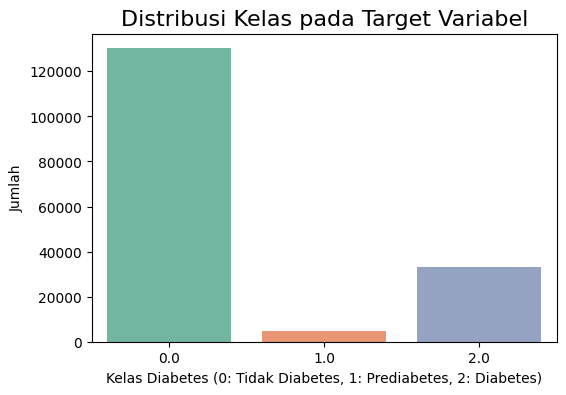

Distribusi Persentase Setiap Kelas:
 Diabetes_012
no diabetes    82.711364
diabetes       15.274109
prediabetes     2.014527
Name: proportion, dtype: float64


In [ ]:
# Pemeriksaan ketidakseimbangan kelas pada target variabel
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=data_cleaned_no_duplicates, palette='Set2')
plt.title('Distribusi Kelas pada Target Variabel', fontsize=16)
plt.xlabel('Kelas Diabetes (0: Tidak Diabetes, 1: Prediabetes, 2: Diabetes)')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan distribusi persentase setiap kelas
class_distribution = data['Diabetes_012'].value_counts(normalize=True) * 100
print("Distribusi Persentase Setiap Kelas:\n", class_distribution)

In [ ]:
from sklearn.utils import resample

# Pisahkan data menjadi 3 kelas berdasarkan kolom target 'Diabetes_012'
non_diabetes = data_cleaned_no_duplicates[data_cleaned_no_duplicates['Diabetes_012'] == 0]
prediabetes = data_cleaned_no_duplicates[data_cleaned_no_duplicates['Diabetes_012'] == 1]
diabetes = data_cleaned_no_duplicates[data_cleaned_no_duplicates['Diabetes_012'] == 2]

# Hitung rata-rata ukuran kelas
mean_class_size = int(data_cleaned_no_duplicates['Diabetes_012'].value_counts().mean())

# 1. Downsampling pada kelas mayoritas (non_diabetes) dan upsampling pada kelas diabetes dan prediabetes
non_diabetes_downsampled = non_diabetes.sample(n=mean_class_size, random_state=42)

# 2. Upsampling pada kelas diabetes dan prediabetes hingga rata-rata ukuran kelas
diabetes_upsampled = resample(diabetes,
                               replace=True,  # Mengizinkan pengulangan sampel
                               n_samples=mean_class_size,  # Menyesuaikan jumlah kelas
                               random_state=42)

prediabetes_upsampled = resample(prediabetes,
                                 replace=True,  # Mengizinkan pengulangan sampel
                                 n_samples=mean_class_size,  # Menyesuaikan jumlah kelas
                                 random_state=42)

# Gabungkan kembali dataset yang sudah di-downsample dan di-upsample
data_balanced = pd.concat([non_diabetes_downsampled, prediabetes_upsampled, diabetes_upsampled])

# Cek distribusi kelas setelah downsampling dan upsampling
print(f"Distribusi kelas setelah downsampling dan upsampling:\n{data_balanced['Diabetes_012'].value_counts()}")

# Cek beberapa baris dari data yang sudah di-downsample dan di-upsample
data_balanced.head()


Distribusi kelas setelah downsampling dan upsampling:
Diabetes_012
0.0    55978
1.0    55978
2.0    55978
Name: count, dtype: int64


,Diabetes_012,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
209770,0.0,1.0,1.0,-0.511806,0.0,0.0,1.0,-0.478619,0.316350,1.0,1.299149,-0.051162,0.456813
63660,0.0,0.0,0.0,-1.268387,0.0,0.0,0.0,2.329121,2.954590,1.0,1.299149,-1.065595,-0.991662
12113,0.0,1.0,1.0,0.093458,0.0,1.0,1.0,2.329121,0.316350,1.0,1.626566,-1.065595,-1.957312
220931,0.0,1.0,1.0,0.547407,0.0,0.0,1.0,-0.478619,0.660468,0.0,-0.010516,-0.051162,0.939638
101156,0.0,0.0,1.0,-0.057858,0.0,0.0,0.0,-1.414532,-0.486592,0.0,0.971733,-0.051162,-0.991662


<ipython-input-25-103e4d526530>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_012', data=data_balanced, palette='Set2')


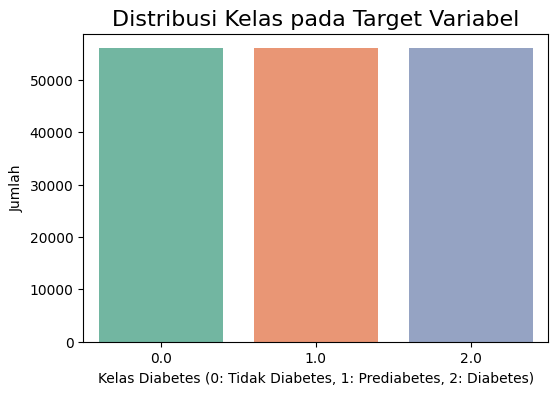

Distribusi Persentase Setiap Kelas:
 Diabetes_012
0.0    33.333333
1.0    33.333333
2.0    33.333333
Name: proportion, dtype: float64


In [ ]:
# Pemeriksaan ketidakseimbangan kelas pada target variabel
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=data_balanced, palette='Set2')
plt.title('Distribusi Kelas pada Target Variabel', fontsize=16)
plt.xlabel('Kelas Diabetes (0: Tidak Diabetes, 1: Prediabetes, 2: Diabetes)')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan distribusi persentase setiap kelas
class_distribution = data_balanced['Diabetes_012'].value_counts(normalize=True) * 100
print("Distribusi Persentase Setiap Kelas:\n", class_distribution)

In [ ]:
# Mengonversi kolom target 'Diabetes_012' menjadi tipe kategori
data_balanced['Diabetes_012'] = data_balanced['Diabetes_012'].map({0: 'no diabetes', 1: 'prediabetes', 2: 'diabetes'}).astype('category')

# Memeriksa tipe data untuk memastikan perubahan
data_balanced.dtypes

,0
Diabetes_012,category
HighBP,float64
HighChol,float64
BMI,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
GenHlth,float64
PhysHlth,float64
DiffWalk,float64


In [ ]:
# Memisahkan fitur (X) dan target (y)
X = data_balanced.drop('Diabetes_012', axis=1)
y = data_balanced['Diabetes_012']

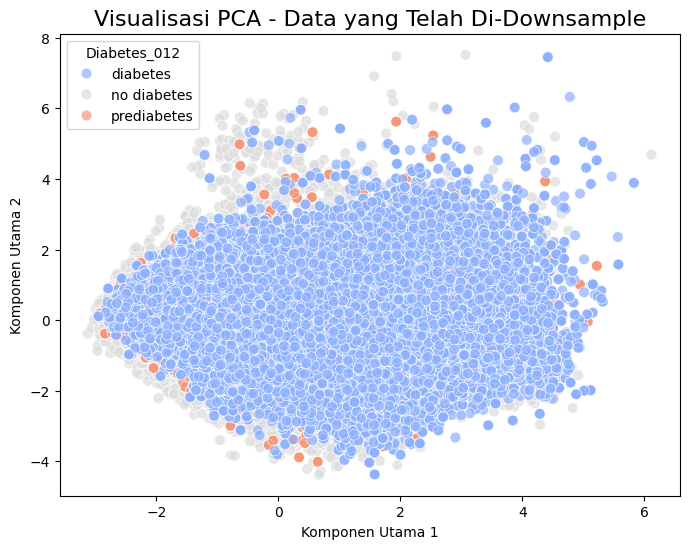

In [ ]:
# Terapkan PCA untuk mengurangi dimensi menjadi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi data setelah PCA (2D plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', s=60, alpha=0.7)
plt.title('Visualisasi PCA - Data yang Telah Di-Downsample', fontsize=16)
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.show()

## Pembuatan Model

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Membuat Model Neural Network menggunakan Keras (TensorFlow)
model = models.Sequential()

# Layer input dan hidden layer
model.add(layers.Dense(128, input_dim=X_train.shape[1]))  # Layer input
model.add(layers.LeakyReLU(alpha=0.1))  # LeakyReLU sebagai fungsi aktivasi setelah layer Dense

model.add(layers.Dense(64))  # Hidden layer 1 dengan 64 neuron
model.add(layers.LeakyReLU(alpha=0.1))  # LeakyReLU untuk Hidden layer 1

model.add(layers.Dense(32))  # Hidden layer 2 dengan 32 neuron
model.add(layers.LeakyReLU(alpha=0.1))  # LeakyReLU untuk Hidden layer 2

model.add(layers.Dense(16))  # Hidden layer 3 dengan 16 neuron
model.add(layers.LeakyReLU(alpha=0.1))  # LeakyReLU untuk Hidden layer 3

# Output layer (3 kelas: 0, 1, 2 untuk klasifikasi diabetes)
model.add(layers.Dense(3, activation='softmax'))  # Softmax untuk klasifikasi multiclass

# Compile model
model.compile(optimizer='adam',  # Optimizer Adam
              loss='sparse_categorical_crossentropy',  # Fungsi loss untuk klasifikasi multiclass
              metrics=['accuracy'])  # Metrik akurasi

# Menampilkan ringkasan model
model.summary()

# Latih model dengan data pelatihan
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan akurasi pada data uji
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy[1]:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,579 (49.14 KB)

 Trainable params: 12,579 (49.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 51s 13ms/step - accuracy: 0.4852 - loss: 1.0077 - val_accuracy: 0.4814 - val_loss: 1.0052
Epoch 2/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5039 - loss: 0.9895 - val_accuracy: 0.4870 - val_loss: 1.0033
Epoch 3/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5124 - loss: 0.9801 - val_accuracy: 0.4789 - val_loss: 1.0071
Epoch 4/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5190 - loss: 0.9708 - val_accuracy: 0.4888 - val_loss: 1.0026
Epoch 5/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5298 - loss: 0.9559 - val_accuracy: 0.4982 - val_loss: 0.9926
Epoch 6/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5427 - loss: 0.9402 - val_accuracy: 0.5047 - val_loss: 1.0061
Epoch 7/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5565 - loss: 0.9233 - val_accuracy: 0.5007 - val_loss: 0.9991
Epoch 8/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5659 - loss: 0.9

In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd

# Fungsi untuk membangun model dengan hyperparameter yang bisa disesuaikan
def build_model(hp):
    model = models.Sequential()

    # Menambahkan layer input dengan jumlah neuron yang ditentukan oleh hyperparameter
    model.add(layers.Dense(
        hp.Int('units', min_value=32, max_value=128, step=32),
        input_dim=X_train.shape[1],
        activation='relu'
    ))

    # Menambahkan beberapa hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Menggunakan 1 hingga 3 hidden layers
        model.add(layers.Dense(
            hp.Int('units', min_value=32, max_value=128, step=32),
            activation='relu'
        ))

    # Output layer untuk klasifikasi multiclass
    model.add(layers.Dense(3, activation='softmax'))

    # Mengompilasi model dengan learning rate yang ditentukan oleh hyperparameter
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Mencari hyperparameter terbaik menggunakan Hyperband
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',  # Mengoptimalkan akurasi validasi
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='diabetes_tuning'
)

# Menjalankan pencarian hyperparameter
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Mendapatkan hyperparameter terbaik
best_hp = tuner.get_best_hyperparameters()[0]

# Membangun dan melatih model dengan hyperparameter terbaik
model = tuner.hypermodel.build(best_hp)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model pada data uji
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy[1]:.4f}")


Trial 60 Complete [00h 01m 40s]
val_accuracy: 0.4948095381259918

Best val_accuracy So Far: 0.5234116315841675
Total elapsed time: 00h 41m 39s
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3674/3674 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4853 - loss: 1.0064 - val_accuracy: 0.4849 - val_loss: 1.0037
Epoch 2/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5122 - loss: 0.9825 - val_accuracy: 0.4919 - val_loss: 0.9948
Epoch 3/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5308 - loss: 0.9573 - val_accuracy: 0.4966 - val_loss: 1.0000
Epoch 4/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5519 - loss: 0.9277 - val_accuracy: 0.5014 - val_loss: 1.0044
Epoch 5/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5848 - loss: 0.8837 - val_accuracy: 0.5100 - val_loss: 1.0226
Epoch 6/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.6134 - loss: 0.8388 - val_accuracy: 0.5201 - val_loss: 1.0153
Epoch 7/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6351 - loss: 0.7980 - val_accuracy: 0.5144 - val_loss: 1.0500
Epoch 8/10
3674/3674 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6518 - loss: 0.7641 - val

## Evaluasi Model

1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Test Accuracy: 0.5274

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.70      0.57     16930
           1       0.60      0.47      0.53     16654
           2       0.54      0.41      0.47     16797

    accuracy                           0.53     50381
   macro avg       0.54      0.53      0.52     50381
weighted avg       0.54      0.53      0.52     50381



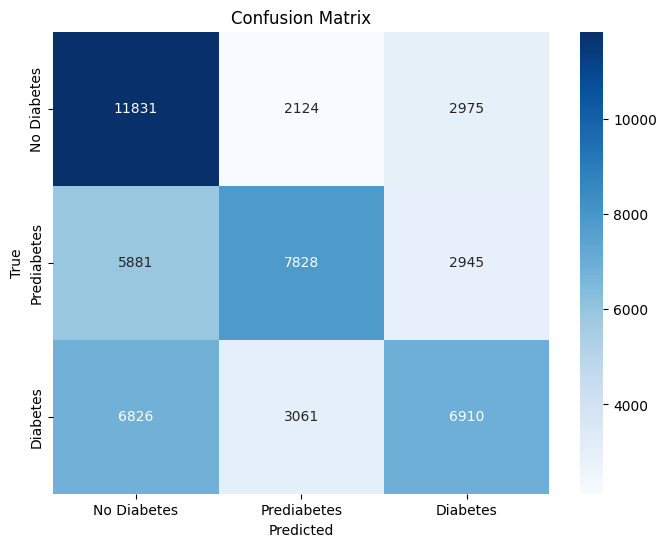

Accuracy Score: 0.5274


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan prediksi pada data uji (jika belum dilakukan)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Evaluasi model dengan akurasi
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy[1]:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Menampilkan Confusion Matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Jika ingin melihat akurasi lebih rinci
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_classes):.4f}")


## Inferensi Model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data input untuk inferensi
input_data = {
    'HighBP': [1],  # High Blood Pressure
    'HighChol': [1],  # High Cholesterol
    'BMI': [32.5],  # Body Mass Index
    'Stroke': [0],  # No Stroke
    'HeartDiseaseorAttack': [1],  # Has Heart Disease or Attack
    'PhysActivity': [1],  # Physical Activity (Yes)
    'GenHlth': [2],  # General Health (Very Good)
    'PhysHlth': [5],  # Physical Health (Not good for 5 days)
    'DiffWalk': [1],  # Difficulty Walking (Yes)
    'Age': [9],  # Age Category (60-64 years)
    'Education': [4],  # High School Graduate (Grade 12 or GED)
    'Income': [5],  # Income less than $35,000
}

# Membuat DataFrame dari input_data
input_df = pd.DataFrame(input_data)

# Standarisasi fitur numerik (yang diperlukan)
columns_to_standardize = ['BMI', 'GenHlth', 'PhysHlth', 'Age', 'Education', 'Income']
scaler = StandardScaler()

# Pastikan hanya fitur numerik yang distandarisasi
input_df[columns_to_standardize] = scaler.fit_transform(input_df[columns_to_standardize])

# Inferensi dengan model yang sudah dilatih (misalnya menggunakan TensorFlow model)
predictions = model.predict(input_df)

# Menampilkan hasil prediksi
predicted_class = np.argmax(predictions)  # Mengambil kelas dengan probabilitas tertinggi
print(f"Prediksi Kelas: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediksi Kelas: 0


In [ ]:
# Menyimpan model
model.save('diabetes_model.h5')
